# Project 5: Disneyland NLP & Ratings

### 1. Imports

In [318]:
import os
import sys

# essentials:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


# plotly:
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# scikit-learn:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, balanced_accuracy_score, accuracy_score, RocCurveDisplay, roc_auc_score, recall_score, precision_score, confusion_matrix
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, roc_auc_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingRegressor, BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier, HistGradientBoostingClassifier, HistGradientBoostingRegressor 
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.inspection import plot_partial_dependence
from sklearn.feature_extraction import text 
from sklearn.svm import SVC

# NN & NLP scikit-learn:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_openml, make_classification, make_regression
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin

# unsupervised learning scikit-learn:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity

# imblearn:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SMOTENC

# API & Webscraping:
import time
import requests
import datetime
from bs4 import BeautifulSoup

# nltk:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.chunk.regexp import RegexpParser
from nltk.chunk import tree2conlltags
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader

# tensorflow/keras:
import tensorflow as tf
import tensorboard
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, LSTM, GRU, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

# time series/sktime:
import sktime
import statsmodels
import pmdarima as pmd
import pandas_datareader as pdr
from keras.preprocessing.sequence import TimeseriesGenerator
from sktime.forecasting.compose import EnsembleForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS
from sktime.utils.plotting import plot_series


# spacy: 
import spacy
from spacy.matcher import Matcher
from spacy import displacy

# statsmodels:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# emojis:
import emoji
import demoji

# others:
import scipy.stats as stats
import missingno as msno
from itertools import groupby
from IPython.display import display

### 2. Read in & Inspect Data

In [133]:
disney = pd.read_csv('./data/DisneylandReviews.csv', encoding='latin-1')

In [134]:
disney = disney[(disney['Branch'] == 'Disneyland_Paris') | (disney['Branch'] == 'Disneyland_California')]

In [135]:
disney.head()

Review_ID  Rating Year_Month Reviewer_Location  \
9620  670801367       5     2019-4     United States   
9621  670760708       5     2019-4     United States   
9622  670565072       4     2019-5         Australia   
9623  670544335       5     2019-4     United States   
9624  670472278       5     2019-4            Canada   

                                            Review_Text                 Branch  
9620  This place has always been and forever will be...  Disneyland_California  
9621  A great day of simple fun and thrills. Bring c...  Disneyland_California  
9622  All and all a great day was had. The crowds ar...  Disneyland_California  
9623  Having been to the Florida location numerous t...  Disneyland_California  
9624  Had the 4 day pass, spent 3 at DL and one at C...  Disneyland_California

In [136]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33036 entries, 9620 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          33036 non-null  int64 
 1   Rating             33036 non-null  int64 
 2   Year_Month         33036 non-null  object
 3   Reviewer_Location  33036 non-null  object
 4   Review_Text        33036 non-null  object
 5   Branch             33036 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


In [137]:
disney.describe()

Review_ID        Rating
count  3.303600e+04  33036.000000
mean   3.099758e+08      4.221637
std    1.646923e+08      1.098414
min    1.398724e+06      1.000000
25%    1.683479e+08      4.000000
50%    2.792432e+08      5.000000
75%    4.374145e+08      5.000000
max    6.708014e+08      5.000000

In [138]:
disney.isna().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [139]:
disney['Rating'].nunique()

5

In [140]:
disney['Rating'].value_counts()

5    18629
4     7545
3     3744
2     1791
1     1327
Name: Rating, dtype: int64

In [141]:
disney['Branch'].value_counts()

Disneyland_California    19406
Disneyland_Paris         13630
Name: Branch, dtype: int64

In [142]:
disney['Reviewer_Location'].value_counts()

United States          13670
United Kingdom          9011
Australia               3043
Canada                  2030
New Zealand              589
                       ...  
Mali                       1
Antigua and Barbuda        1
Uzbekistan                 1
Suriname                   1
Andorra                    1
Name: Reviewer_Location, Length: 155, dtype: int64

### 3. Feature Engineering

In [143]:
# text word count column
disney['text_word_count'] = disney['Review_Text'].str.split().str.len()

In [144]:
# get months function
def get_months(date):
    return (date[5:])
    

In [145]:
# month column
disney['month'] = disney['Year_Month'].map(get_months)

In [146]:
# get years function
def get_years(date):
    return (date[0:4])

In [147]:
# year column
disney['year'] = disney['Year_Month'].map(get_years)

### 4. Remove Unnecessary Characters with RegEx

In [148]:
# citation: Breakfast Hour - NLP Practice I

def regex_cleaner(words):
    
    # set token
    my_tokenizer = RegexpTokenizer("[\w']+|\$[\d\.]+")
    
    # tokenize words
    clean_words = my_tokenizer.tokenize(words.lower())
    
    # return words
    return ' '.join(clean_words)

In [149]:
disney['clean_text'] = disney['Review_Text'].map(regex_cleaner)

In [150]:
disney.head()

Review_ID  Rating Year_Month Reviewer_Location  \
9620  670801367       5     2019-4     United States   
9621  670760708       5     2019-4     United States   
9622  670565072       4     2019-5         Australia   
9623  670544335       5     2019-4     United States   
9624  670472278       5     2019-4            Canada   

                                            Review_Text  \
9620  This place has always been and forever will be...   
9621  A great day of simple fun and thrills. Bring c...   
9622  All and all a great day was had. The crowds ar...   
9623  Having been to the Florida location numerous t...   
9624  Had the 4 day pass, spent 3 at DL and one at C...   

                     Branch  text_word_count month  year  \
9620  Disneyland_California               50     4  2019   
9621  Disneyland_California               62     4  2019   
9622  Disneyland_California               75     5  2019   
9623  Disneyland_California              172     4  2019   
9624  Disneyland_California               41     4  2019   

                                             clean_text  
9620  this place has always been and forever will be...  
9621  a great day of simple fun and thrills bring ca...  
9622  all and all a great day was had the crowds are...  
9623  having been to the florida location numerous t...  
9624  had the 4 day pass spent 3 at dl and one at ca...

### 5. Cleaning

In [151]:
# create target column
disney['is_cali'] = [1 if i == 'Disneyland_California' else 0 for i in disney['Branch']]

In [152]:
disney.head()

Review_ID  Rating Year_Month Reviewer_Location  \
9620  670801367       5     2019-4     United States   
9621  670760708       5     2019-4     United States   
9622  670565072       4     2019-5         Australia   
9623  670544335       5     2019-4     United States   
9624  670472278       5     2019-4            Canada   

                                            Review_Text  \
9620  This place has always been and forever will be...   
9621  A great day of simple fun and thrills. Bring c...   
9622  All and all a great day was had. The crowds ar...   
9623  Having been to the Florida location numerous t...   
9624  Had the 4 day pass, spent 3 at DL and one at C...   

                     Branch  text_word_count month  year  \
9620  Disneyland_California               50     4  2019   
9621  Disneyland_California               62     4  2019   
9622  Disneyland_California               75     5  2019   
9623  Disneyland_California              172     4  2019   
9624  Disneyland_California               41     4  2019   

                                             clean_text  is_cali  
9620  this place has always been and forever will be...        1  
9621  a great day of simple fun and thrills bring ca...        1  
9622  all and all a great day was had the crowds are...        1  
9623  having been to the florida location numerous t...        1  
9624  had the 4 day pass spent 3 at dl and one at ca...        1

In [153]:
disney.drop(columns = ['Branch'])

Review_ID  Rating Year_Month Reviewer_Location  \
9620   670801367       5     2019-4     United States   
9621   670760708       5     2019-4     United States   
9622   670565072       4     2019-5         Australia   
9623   670544335       5     2019-4     United States   
9624   670472278       5     2019-4            Canada   
...          ...     ...        ...               ...   
42651    1765031       5    missing    United Kingdom   
42652    1659553       5    missing            Canada   
42653    1645894       5    missing      South Africa   
42654    1618637       4    missing     United States   
42655    1536786       4    missing    United Kingdom   

                                             Review_Text  text_word_count  \
9620   This place has always been and forever will be...               50   
9621   A great day of simple fun and thrills. Bring c...               62   
9622   All and all a great day was had. The crowds ar...               75   
9623   Having been to the Florida location numerous t...              172   
9624   Had the 4 day pass, spent 3 at DL and one at C...               41   
...                                                  ...              ...   
42651  i went to disneyland paris in july 03 and thou...              173   
42652  2 adults and 1 child of 11 visited Disneyland ...              191   
42653  My eleven year old daughter and myself went to...              109   
42654  This hotel, part of the Disneyland Paris compl...              112   
42655  I went to the Disneyparis resort, in 1996, wit...              179   

      month  year                                         clean_text  is_cali  
9620      4  2019  this place has always been and forever will be...        1  
9621      4  2019  a great day of simple fun and thrills bring ca...        1  
9622      5  2019  all and all a great day was had the crowds are...        1  
9623      4  2019  having been to the florida location numerous t...        1  
9624      4  2019  had the 4 day pass spent 3 at dl and one at ca...        1  
...     ...   ...                                                ...      ...  
42651    ng  miss  i went to disneyland paris in july 03 and thou...        0  
42652    ng  miss  2 adults and 1 child of 11 visited disneyland ...        0  
42653    ng  miss  my eleven year old daughter and myself went to...        0  
42654    ng  miss  this hotel part of the disneyland paris comple...        0  
42655    ng  miss  i went to the disneyparis resort in 1996 with ...        0  

[33036 rows x 10 columns]

### 6. EDA

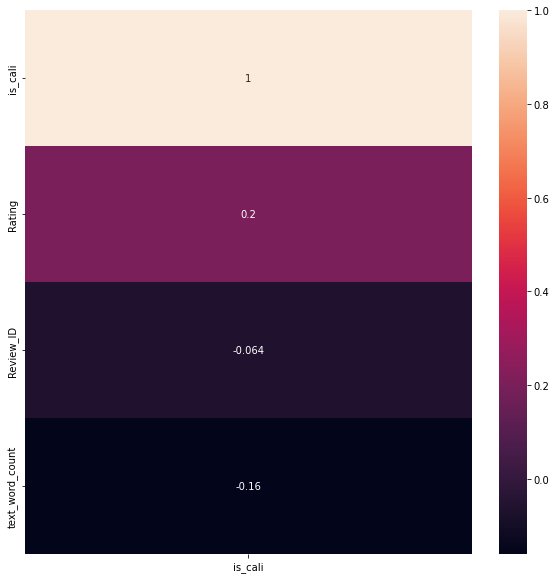

In [163]:
# heatmap of correlations of features in order
plt.figure(figsize=(10,10))
sns.heatmap(disney.corr()[['is_cali']].sort_values(by='is_cali', ascending=False), annot=True);

In [155]:
disney_paris = disney[(disney['Branch'] == 'Disneyland_Paris')]

In [156]:
disney_cali = disney[(disney['Branch'] == 'Disneyland_California')]

In [261]:
disney_bad_reviews = disney[(disney['Rating'] <= 1)]

In [260]:
disney_good_reviews = disney[(disney['Rating'] >= 4)]

In [158]:
disney_paris.describe()

Review_ID        Rating  text_word_count  is_cali
count  1.363000e+04  13630.000000     13630.000000  13630.0
mean   3.224980e+08      3.960088       169.369773      0.0
std    1.711272e+08      1.205324       189.205720      0.0
min    1.536786e+06      1.000000         3.000000      0.0
25%    1.744501e+08      3.000000        58.000000      0.0
50%    2.929989e+08      4.000000       112.000000      0.0
75%    4.645196e+08      5.000000       209.000000      0.0
max    6.707220e+08      5.000000      3963.000000      0.0

In [159]:
disney_cali.describe()

Review_ID        Rating  text_word_count  is_cali
count  1.940600e+04  19406.000000     19406.000000  19406.0
mean   3.011807e+08      4.405339       115.449036      1.0
std    1.594355e+08      0.975600       143.022961      0.0
min    1.398724e+06      1.000000         7.000000      1.0
25%    1.640964e+08      4.000000        39.000000      1.0
50%    2.701216e+08      5.000000        71.000000      1.0
75%    4.198162e+08      5.000000       138.000000      1.0
max    6.708014e+08      5.000000      3527.000000      1.0

In [239]:
disney.describe()

Review_ID        Rating  text_word_count       is_cali
count  3.303600e+04  33036.000000     33036.000000  33036.000000
mean   3.099758e+08      4.221637       137.695665      0.587420
std    1.646923e+08      1.098414       165.800045      0.492306
min    1.398724e+06      1.000000         3.000000      0.000000
25%    1.683479e+08      4.000000        45.000000      0.000000
50%    2.792432e+08      5.000000        85.000000      1.000000
75%    4.374145e+08      5.000000       167.000000      1.000000
max    6.708014e+08      5.000000      3963.000000      1.000000

**Ratings**

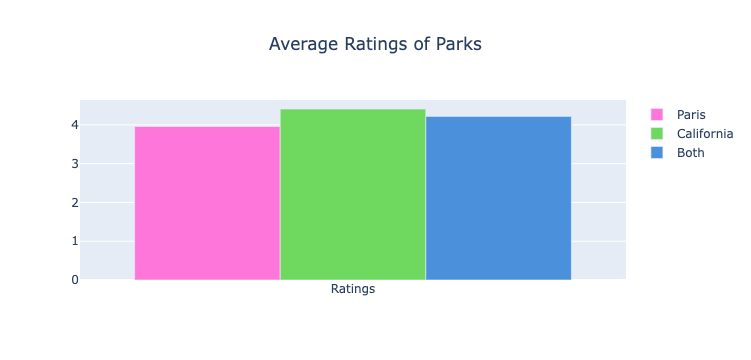

In [251]:
# citation: https://plotly.com/python/bar-charts/
word_counts=['Ratings']

fig = go.Figure(data=[
    go.Bar(name='Paris', x=word_counts, y=[3.96], marker = {'color': '#FF76DA'}),
    go.Bar(name='California', x=word_counts, y=[4.41], marker = {'color': '#6ED85F'}),
    go.Bar(name='Both', x=word_counts, y=[4.22], marker = {'color': '#4B90DA'})
    
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Average Ratings of Parks', title_x=.5)
fig.show()

In [252]:
# histogtam of word count for both disneylands data
fig = px.histogram(disney, x = 'Rating', color_discrete_sequence = ['#4B90DA'], nbins = 20, labels={'text_word_count': 'Word Counts', 'count': 'Frequency'})
fig.update_layout(title = 'Distribution of Review Word Counts', title_x=.5)
fig.show()

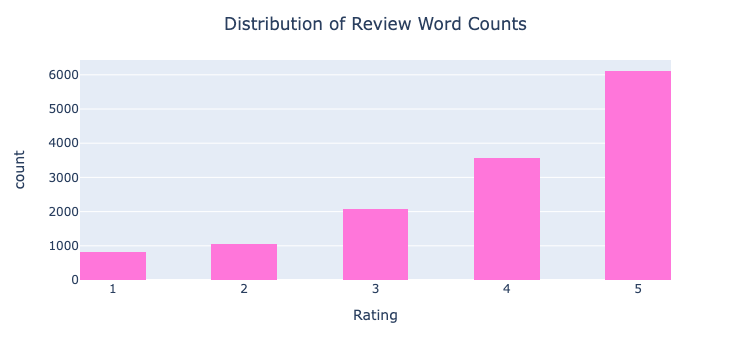

In [253]:
# histogram of word count for disneyland paris data
fig = px.histogram(disney_paris, x = 'Rating', color_discrete_sequence = ['#FF76DA'], nbins = 20, labels={'text_word_count': 'Word Counts', 'count': 'Frequency'})
fig.update_layout(title = 'Distribution of Review Word Counts', title_x=.5)
fig.show()

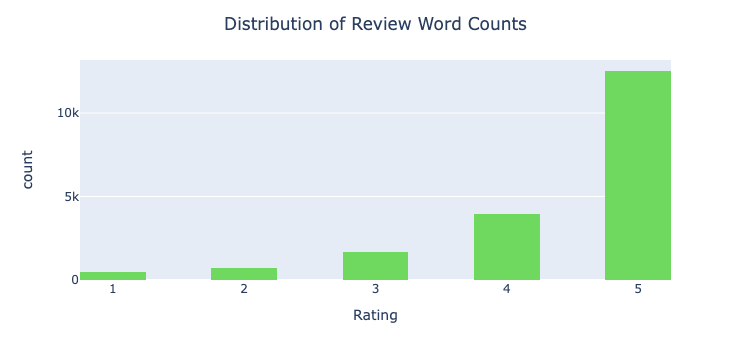

In [254]:
# histogram of word count for disneyland  data
fig = px.histogram(disney_cali, x = 'Rating', color_discrete_sequence = ['#6ED85F'], nbins = 20, labels={'text_word_count': 'Word Counts', 'count': 'Frequency'})
fig.update_layout(title = 'Distribution of Review Word Counts', title_x=.5)
fig.show()

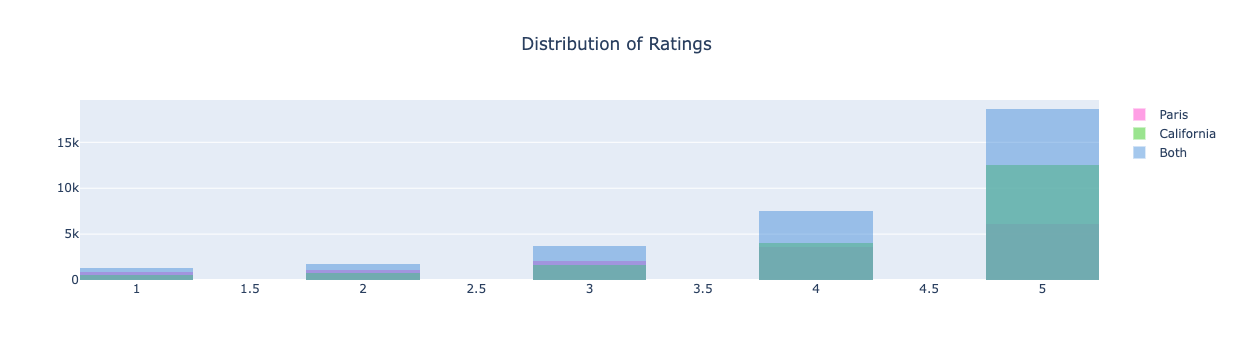

In [259]:
fig = go.Figure(data=[
    go.Histogram(name='Paris', x=disney_paris['Rating'],
                 marker = {'color': '#FF76DA'}, opacity = .7,
                 nbinsx=20
                ),
    go.Histogram(name='California', x=disney_cali['Rating'],
                 marker = {'color': '#6ED85F'}, opacity = .7,
                 nbinsx=20
                ),
    go.Histogram(name='Both', x=disney['Rating'],
                 marker = {'color': '#4B90DA'}, opacity = .5,
                 nbinsx=20
                )])

# Change the bar mode
fig.update_layout( title = 'Distribution of Ratings', title_x=.5,  barmode='overlay')
fig.show()

**Word Counts**

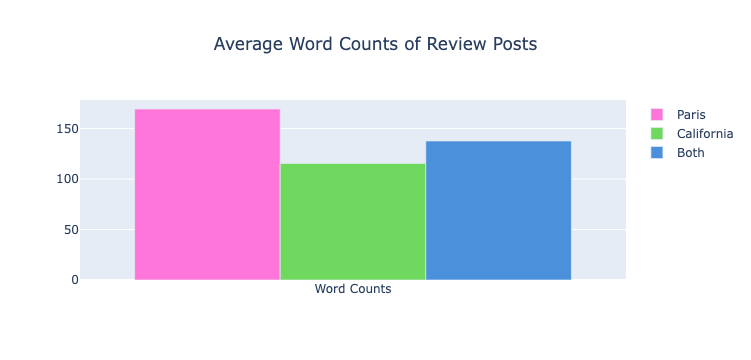

In [241]:
# citation: https://plotly.com/python/bar-charts/
word_counts=['Word Counts']

fig = go.Figure(data=[
    go.Bar(name='Paris', x=word_counts, y=[169.37], marker = {'color': '#FF76DA'}),
    go.Bar(name='California', x=word_counts, y=[115.45], marker = {'color': '#6ED85F'}),
    go.Bar(name='Both', x=word_counts, y=[137.69], marker = {'color': '#4B90DA'})
    
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Average Word Counts of Review Posts', title_x=.5)
fig.show()

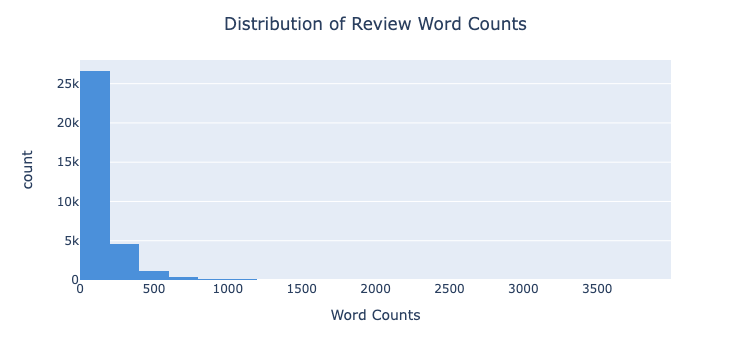

In [234]:
# histogtam of word count for both disneylands data
fig = px.histogram(disney, x = 'text_word_count', color_discrete_sequence = ['#4B90DA'], nbins = 20, labels={'text_word_count': 'Word Counts', 'count': 'Frequency'})
fig.update_layout(title = 'Distribution of Review Word Counts', title_x=.5)
fig.show()

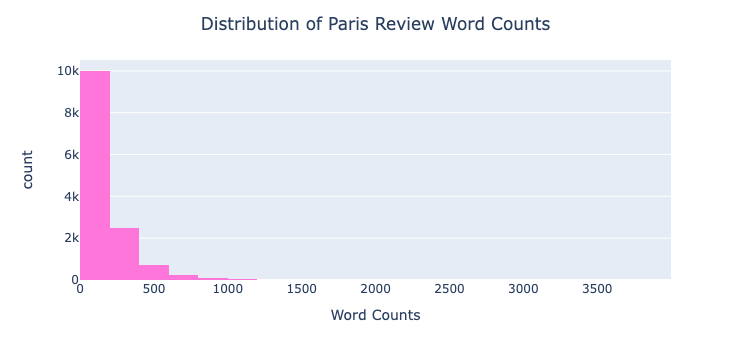

In [256]:
# histogram of word count for disneyland paris data
fig = px.histogram(disney_paris, x = 'text_word_count', color_discrete_sequence = ['#FF76DA'], nbins = 20, labels={'text_word_count': 'Word Counts', 'count': 'Frequency'})
fig.update_layout(title = 'Distribution of Paris Review Word Counts', title_x=.5)
fig.show()

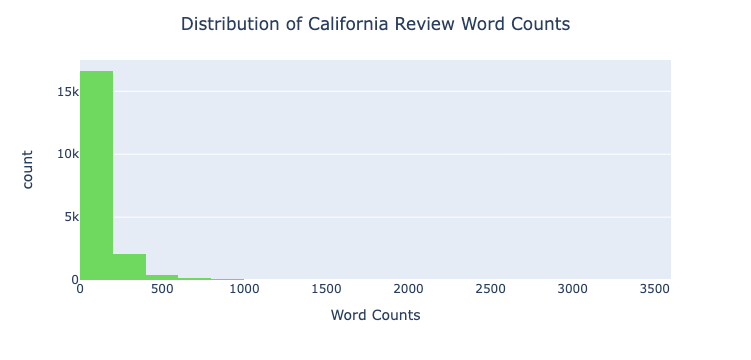

In [255]:
# histogram of word count for disneyland  data
fig = px.histogram(disney_cali, x = 'text_word_count', color_discrete_sequence = ['#6ED85F'], nbins = 20, labels={'text_word_count': 'Word Counts', 'count': 'Frequency'})
fig.update_layout(title = 'Distribution of California Review Word Counts', title_x=.5)
fig.show()

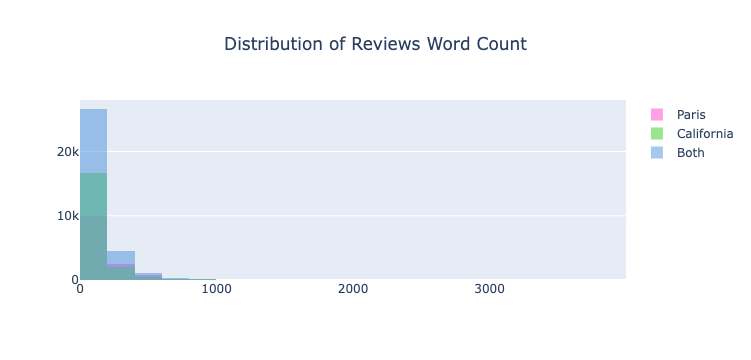

In [257]:
fig = go.Figure(data=[
    go.Histogram(name='Paris', x=disney_paris['text_word_count'],
                 marker = {'color': '#FF76DA'}, opacity = .7,
                 nbinsx=20
                ),
    go.Histogram(name='California', x=disney_cali['text_word_count'],
                 marker = {'color': '#6ED85F'}, opacity = .7,
                 nbinsx=20
                ),
    go.Histogram(name='Both', x=disney['text_word_count'],
                 marker = {'color': '#4B90DA'}, opacity = .5,
                 nbinsx=20
                )])

# Change the bar mode
fig.update_layout( title = 'Distribution of Reviews Word Count', title_x=.5,  barmode='overlay')
fig.show()

**Popular Words**

In [297]:
# get popular words function
def get_popular_words(df, column_name, num):
    X = df[column_name]
    
    # some common words that I went to exclude from being in the popular word list
    extra_stops = pd.array(["like", "don", "just"])
    
    # instance of count vectorizer, combines stop words and extra stop words
    cvect_nostop = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(extra_stops))
    
    #fit it
    X_no_stop = cvect_nostop.fit_transform(X.apply(lambda x: np.str_(x)))
    
    #examine the words
    crypto_text_nostop = pd.DataFrame(X_no_stop.toarray(), columns = cvect_nostop.get_feature_names_out())
    
    return pd.DataFrame(crypto_text_nostop.sum().sort_values().tail(num))

In [264]:
paris_popular_words = get_popular_words(disney_paris, 'clean_text', 10)

In [265]:
cali_popular_words = get_popular_words(disney_cali, 'clean_text', 10)

In [298]:
bad_popular_words = get_popular_words(disney_bad_reviews, 'clean_text', 10)

In [299]:
good_popular_words = get_popular_words(disney_good_reviews, 'clean_text', 10)

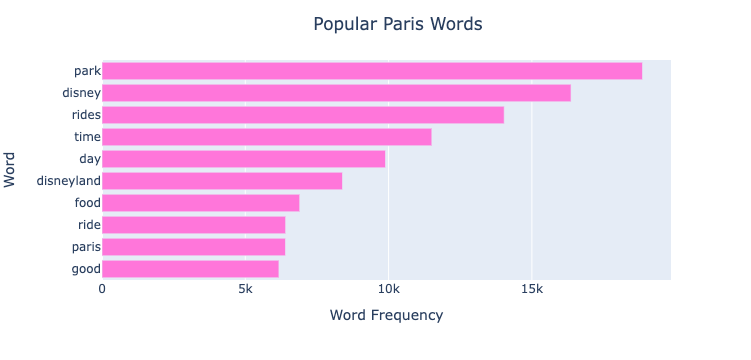

In [267]:
fig = px.bar(paris_popular_words, 
             orientation='h',
             y=paris_popular_words.index,
             x=paris_popular_words[0], 
             color_discrete_sequence = ['#FF76DA'],
             labels={'0': 'Word Frequency', 'index': 'Word'}
            )

fig.update_layout(title = 'Popular Paris Words', title_x=.53, yaxis = dict(tick0 = 0.5, dtick = 0.75))
fig.show()

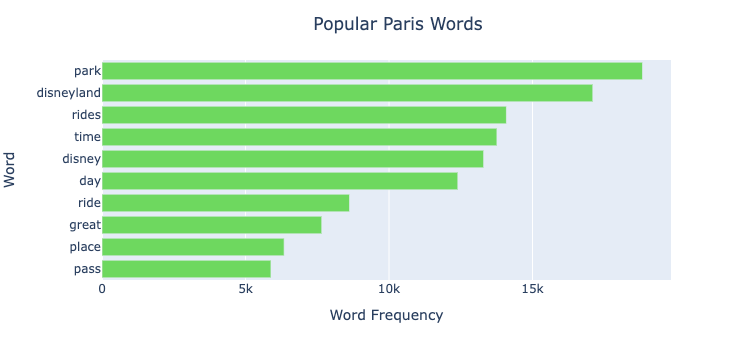

In [268]:
fig = px.bar(cali_popular_words, 
             orientation='h',
             y=cali_popular_words.index,
             x=cali_popular_words[0], 
             color_discrete_sequence = ['#6ED85F'],
             labels={'0': 'Word Frequency', 'index': 'Word'}
            )

fig.update_layout(title = 'Popular California Words', title_x=.53, yaxis = dict(tick0 = 0.5, dtick = 0.75))
fig.show()

In [302]:
fig = px.bar(bad_popular_words, 
             orientation='h',
             y=cali_popular_words.index,
             x=cali_popular_words[0], 
             color_discrete_sequence = ['black'],
             labels={'x': 'Word Frequency', 'y': 'Word'}
            )

fig.update_layout(title = 'Popular Words for Negative Reviews', title_x=.53, yaxis = dict(tick0 = 0.5, dtick = 0.75))
fig.show()

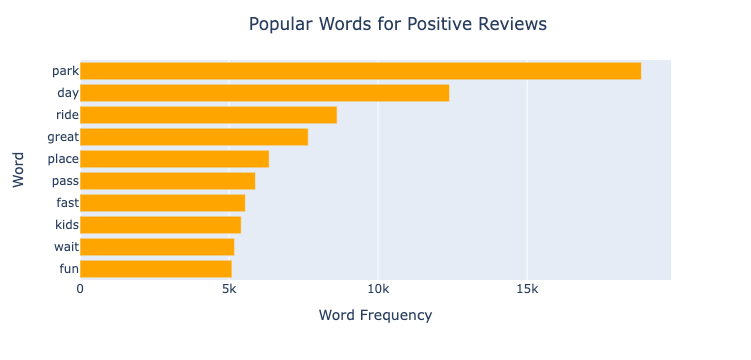

In [304]:
fig = px.bar(good_popular_words, 
             orientation='h',
             y=cali_popular_words.index,
             x=cali_popular_words[0], 
             color_discrete_sequence = ['orange'],
             labels={'x': 'Word Frequency', 'y': 'Word'}
            )

fig.update_layout(title = 'Popular Words for Positive Reviews', title_x=.53, yaxis = dict(tick0 = 0.5, dtick = 0.75))
fig.show()

In [289]:
# get popular words function
def get_popular_words_stop(df, column_name, num):
    X = df[column_name]
    
    # some common words that I went to exclude from being in the popular word list
    extra_stops = pd.array(["like", 'park', "don", "just", 'disney', 'disneyland', 'rides', 'time','park','ride','food','day','ride'])
    
    # instance of count vectorizer, combines stop words and extra stop words
    cvect_nostop = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(extra_stops))
    
    #fit it
    X_no_stop = cvect_nostop.fit_transform(X.apply(lambda x: np.str_(x)))
    
    #examine the words
    crypto_text_nostop = pd.DataFrame(X_no_stop.toarray(), columns = cvect_nostop.get_feature_names_out())
    
    return pd.DataFrame(crypto_text_nostop.sum().sort_values().tail(num))

In [290]:
paris_popular_words_stop = get_popular_words_stop(disney_paris, 'clean_text', 10)

In [291]:
cali_popular_words_stop = get_popular_words_stop(disney_cali, 'clean_text', 10)

In [309]:
bad_popular_words_stop = get_popular_words_stop(disney_bad_reviews, 'clean_text', 10)

In [310]:
good_popular_words_stop = get_popular_words_stop(disney_good_reviews, 'clean_text', 10)

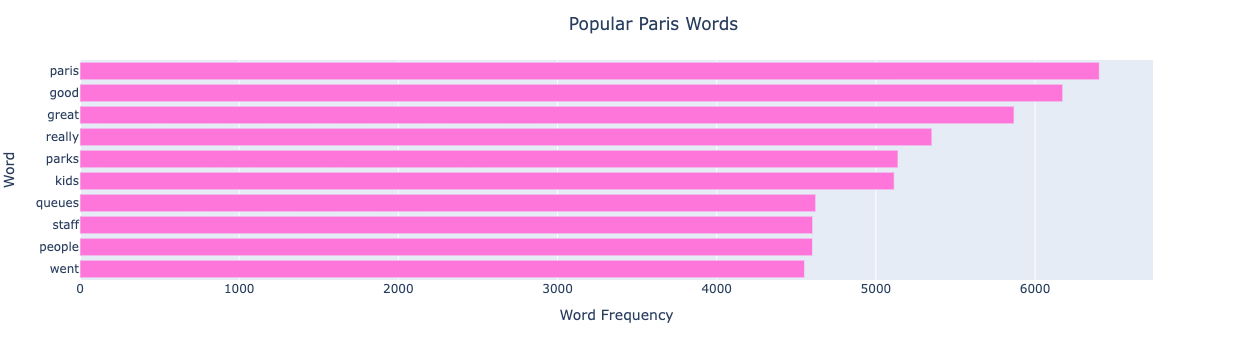

In [306]:
fig = px.bar(paris_popular_words_stop, 
             orientation='h',
             y=paris_popular_words_stop.index,
             x=paris_popular_words_stop[0], 
             color_discrete_sequence = ['#FF76DA'],
             labels={'0': 'Word Frequency', 'index': 'Word'}
            )

fig.update_layout(title = 'Popular Paris Words', title_x=.53, yaxis = dict(tick0 = 0.5, dtick = 0.75))
fig.show()

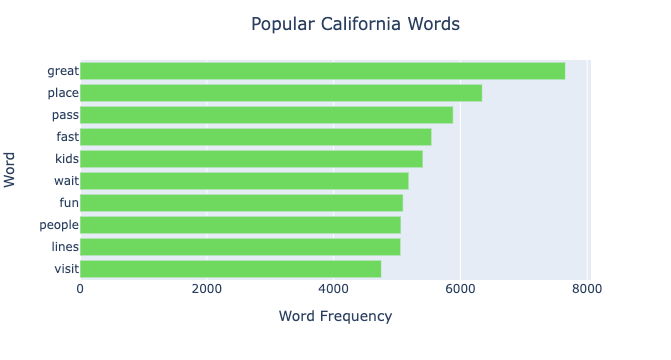

In [305]:
fig = px.bar(cali_popular_words_stop, 
             orientation='h',
             y=cali_popular_words_stop.index,
             x=cali_popular_words_stop[0], 
             color_discrete_sequence = ['#6ED85F'],
             labels={'0': 'Word Frequency', 'index': 'Word'}
            )

fig.update_layout(title = 'Popular California Words', title_x=.53, yaxis = dict(tick0 = 0.5, dtick = 0.75))
fig.show()

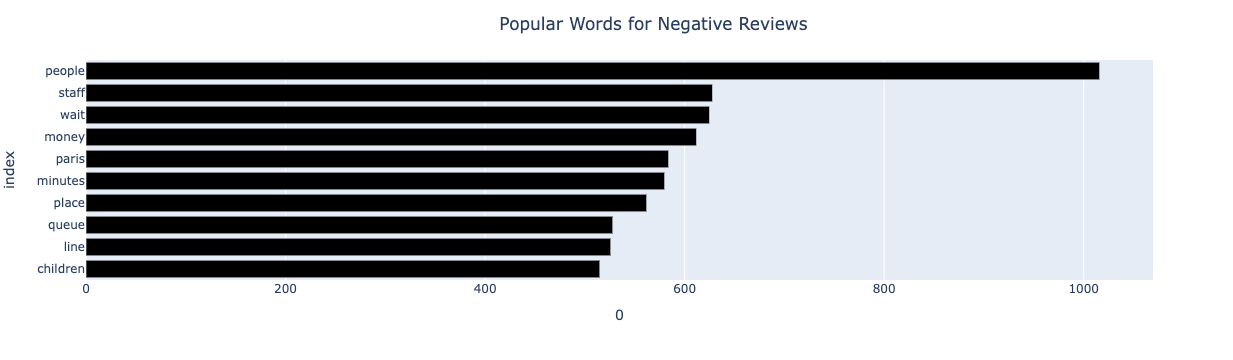

In [311]:
fig = px.bar(bad_popular_words_stop, 
             orientation='h',
             y=bad_popular_words_stop.index,
             x=bad_popular_words_stop[0], 
             color_discrete_sequence = ['black'],
             labels={'0': 'Word Frequency', 'index': 'Word'}
            )

fig.update_layout(title = 'Popular Words for Negative Reviews', title_x=.53, yaxis = dict(tick0 = 0.5, dtick = 0.75))
fig.show()

In [314]:
fig = px.bar(good_popular_words_stop, 
             orientation='h',
             y=good_popular_words_stop.index,
             x=good_popular_words_stop[0], 
             color_discrete_sequence = ['orange'],
             labels={'0': 'Word Frequency', 'index': 'Word'}
            )

fig.update_layout(title = 'Popular Words for Negative Reviews', title_x=.53, yaxis = dict(tick0 = 0.5, dtick = 0.75))
fig.show()

### Model

In [210]:
X = disney['clean_text']
y = disney['is_cali']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, stratify = y)

In [201]:
y_train.value_counts(normalize=True)

1    0.58744
0    0.41256
Name: is_cali, dtype: float64

In [202]:
# function that lemmatizes text

def split_into_lemmas(text):
    '''return lowercased, lemmatizeed list of words as a string from a document passed in '''
   
    text = text.lower()
    lemmer = WordNetLemmatizer()
    return ' '.join([lemmer.lemmatize(word) for word in text.split() ])

In [203]:
# function that stems sentence to make it more understandable

def stem_sentence(sentence): 
    
    p_stemmer = PorterStemmer()
    return ' '.join([p_stemmer.stem(word) for word in sentence.split(' ')])

In [204]:
# function that does train test split, creates a pipline, and scores the given model with transformer
# this function assumes X has two features: clean_title_and_text and clean_emoji

def model_score(transformer, classifier, X,y):
    # train, test, split X and y 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, stratify = y)
    
    # make pipeline
    pipe = make_pipeline(transformer, classifier)
    pipe.fit(X_train, y_train)
    
    # define score
    test_score = np.round(pipe.score(X_test, y_test), 3)
    
    # print model and score
    print (f' model: {transformer, classifier}')
    return (f' test score: {test_score}')

In [205]:
# function that helps guage which hyperparameters to tune in order to avoid running too many parameters in Grid Search

def count_vec_options(classifier, X, y):
    # count vectorizer
    print(model_score(CountVectorizer(), classifier, X, y))
    print(model_score(CountVectorizer(stop_words = 'english'),classifier, X, y))
    print(model_score(CountVectorizer(stop_words = 'english', max_features = 1_000), classifier, X, y))
    print(model_score(CountVectorizer(preprocessor=split_into_lemmas), classifier, X, y))
    print(model_score(CountVectorizer(preprocessor=stem_sentence), classifier, X, y))
    print(model_score(CountVectorizer(ngram_range=(1,2)), classifier, X, y))

In [206]:
# function that helps guage which hyperparameters to tune in order to avoid running too many parameters in Grid Search

def tfidf_vec_options(classifier, X, y):
   # tfidf vectorizer
    print(model_score(TfidfVectorizer(), classifier, X, y))
    print(model_score(TfidfVectorizer(stop_words = 'english'), classifier, X, y))
    print(model_score(TfidfVectorizer(stop_words = 'english', max_features = 1_000), classifier, X, y))
    print(model_score(TfidfVectorizer(preprocessor=split_into_lemmas), classifier, X, y))
    print(model_score(TfidfVectorizer(preprocessor=stem_sentence), classifier, X, y))
    print(model_score(TfidfVectorizer(ngram_range=(1,2)), classifier, X, y))

In [317]:
lr = LogisticRegression(random_state=4)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=4)
bag = BaggingClassifier(random_state=4)
rfc = RandomForestClassifier(random_state=4)
ada = AdaBoostClassifier(random_state=4)
gb = GradientBoostingClassifier(random_state = 4)

In [208]:
models = [lr, knn, dtc, bag, rfc, ada, gb]

In [211]:
for model in models:
    print(model_score(CountVectorizer(), model, X, y))

/Users/olivialara/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 model: (CountVectorizer(), LogisticRegression(random_state=4))
 test score: 0.897
 model: (CountVectorizer(), KNeighborsClassifier())
 test score: 0.678
 model: (CountVectorizer(), DecisionTreeClassifier(random_state=4))
 test score: 0.805
 model: (CountVectorizer(), BaggingClassifier(random_state=4))
 test score: 0.847
 model: (CountVectorizer(), RandomForestClassifier(random_state=4))
 test score: 0.86
 model: (CountVectorizer(), AdaBoostClassifier(random_state=4))
 test score: 0.863
 model: (CountVectorizer(), GradientBoostingClassifier(random_state=4))
 test score: 0.855


In [315]:
count_vec_options(LogisticRegression(random_state = 4), X, y)

/Users/olivialara/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 model: (CountVectorizer(), LogisticRegression(random_state=4))
 test score: 0.897


/Users/olivialara/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 model: (CountVectorizer(stop_words='english'), LogisticRegression(random_state=4))
 test score: 0.899


/Users/olivialara/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 model: (CountVectorizer(max_features=1000, stop_words='english'), LogisticRegression(random_state=4))
 test score: 0.892


/Users/olivialara/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 model: (CountVectorizer(preprocessor=<function split_into_lemmas at 0x1a62e33a0>), LogisticRegression(random_state=4))
 test score: 0.901


/Users/olivialara/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 model: (CountVectorizer(preprocessor=<function stem_sentence at 0x1a62e3550>), LogisticRegression(random_state=4))
 test score: 0.897


/Users/olivialara/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 model: (CountVectorizer(ngram_range=(1, 2)), LogisticRegression(random_state=4))
 test score: 0.902


**Best Model: Logistic Regression with Ngrams**